### Plot structure and dispersion curve of modes 0, 1, 2 BAR

In [2]:
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.io as sio
import pandas as pd

%matplotlib inline

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
def get_Brink(file_fig, file_ratio):
    # Brink mode
    file = sio.loadmat(file_fig)
    z, xpl, xxx, zzz = file['z'][0,:], file['xpl'][0,:], file['xxx'][0,:], file['zzz'][0,:]
    k, f = file['wavenumber'][0][0], file['frequency'][0][0]

    # (u is cross-shore and v is alongshore in Brink. I'm flipping them back right here)
    p0, v0, u0, w0, r0 = file['p_profile'], file['u_profile'],file['v_profile'], file['w_profile'], file['r_profile']

    file_rfw = sio.loadmat(file_ratio)
    R = file_rfw['ratio_for_wave'][0][0]
    print('ratio for wave', R)
    print('k (rad/cm) ', k)
    print('lambda (km) ', (2*np.pi/(k*100E3)))
    print('omega (rad/s) ', f)
    print('c (m/s)', (f/(k*100)))
    scale=0.2
    w = w0 * 0.01 * scale # cms-1 to ms-1 and normalization (?)
    u = u0 * 0.01 * scale # cms-1 to ms-1 and normalization 
    v = v0 * 0.01 * scale # cms-1 to ms-1 and normalization 
    r = r0 * 1.0 * scale # mg/cm³ to kg/m³ and normalization
    p = p0 * 0.1 * scale # dyn/cm² to 0.1 Pa (or kg m-1 s-2) and normalization
    return(u,v,w,r,p,z,k,f,xpl, xxx, zzz)

def plot_Brink(ax2,ax3,ax4,u,v,p,z,xpl,xxx,zzz,minp,maxp,nlev=15):
    landc='#8b7765'
    levels=np.linspace(minp,maxp,nlev)
    p3 = ax4.contourf(xpl, z, p, levels=levels, cmap=cmo.cm.delta, vmin=minp, 
                      vmax=maxp, zorder=1)
    ax4.contour(xpl, z, p, levels=[0], linewidths=2, linestyles='-', colors='k', zorder=2)
    ax4.contour(xpl, z, p, levels=levels, linewidths=1, linestyles='-', colors='k', zorder=2)
    ax4.fill_between(xxx, zzz.min(), zzz, facecolor=landc, zorder=3)
    ax4.set_title('p')

    levels=np.linspace(np.nanmin(v),np.nanmax(v),nlev)
    p4 = ax2.contourf(xpl, z, v, levels=levels, cmap=cmo.cm.balance, vmin=-np.nanmax(v),
                      vmax=np.nanmax(v), zorder=1)
    ax2.contour(xpl, z, v, levels=[0], linewidths=2, linestyles='-', colors='k', zorder=2)
    ax2.contour(xpl, z, v, levels=levels, linewidths=1, linestyles='-', colors='k', zorder=2)
    ax2.fill_between(xxx, zzz.min(), zzz, facecolor=landc, zorder=3)
    ax2.set_title('v, cross-shelf')

    levels=np.linspace(np.nanmin(u),np.nanmax(u),nlev)
    p4 = ax3.contourf(xpl, z, u, levels=levels, cmap=cmo.cm.balance, vmin=np.nanmin(u),
                      vmax=-np.nanmin(u), zorder=1)
    ax3.contour(xpl, z, u, levels=[0], linewidths=2, linestyles='-', colors='k', zorder=2)
    ax3.contour(xpl, z, u, levels=levels, linewidths=1, linestyles='-', colors='k', zorder=2)
    ax3.fill_between(xxx, zzz.min(), zzz, facecolor=landc, zorder=3)
    ax3.set_title('u, along-shelf')

def plot_surface(ax0,ax1,v,p,xpl):
    ax0.plot(xpl,p,'-', color='navy', label='surface pressure')
    ax1.plot(xpl,v,'-', color='navy', label='surface cross-shore vel.')
    ax0.axhline(0, color='0.5')
    ax1.axhline(0, color='0.5')
    ax0.set_ylabel('P')
    ax1.set_ylabel('v')
    ax0.legend()
    ax1.legend()
    ax1.set_xlabel('Cross-shelf distance / km')

### Shelf profile

ratio for wave 126.371098362
k (rad/cm)  1e-10
lambda (km)  628318.530718
omega (rad/s)  1.04709201389e-06
c (m/s) 104.709201389


/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0.5,0,'Cross-shelf distance / km')

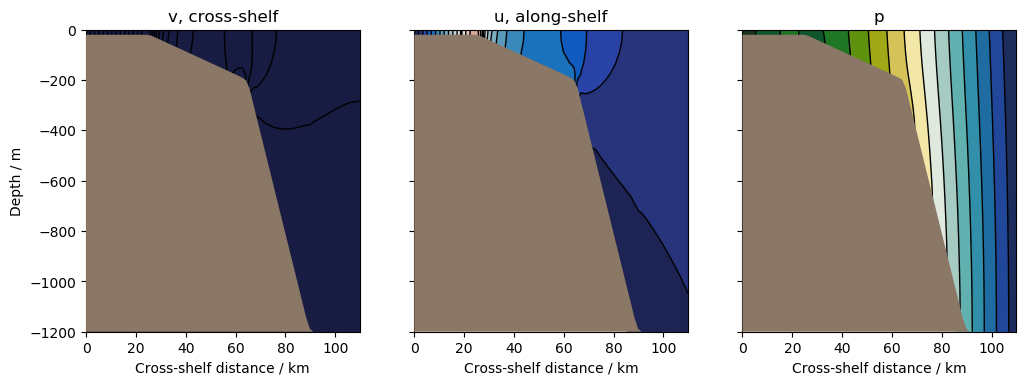

In [5]:
fig, (ax2,ax3,ax4) = plt.subplots(1,3,figsize=(12,4),sharey=True)
u,v,w,r,p,z,k,f,xpl,xxx,zzz = get_Brink('../BAR/figures_mode0_BAR.mat' ,
                                        '../BAR/ratio_for_wave_mode0_BAR.mat')
minp = np.nanmin(p)
maxp = np.nanmax(p)
plot_Brink(ax2, ax3, ax4, u, v, p, z, xpl, xxx, zzz, minp, maxp)
ax2.set_ylabel('Depth / m')
ax2.set_xlabel('Cross-shelf distance / km')
ax3.set_xlabel('Cross-shelf distance / km')
ax4.set_xlabel('Cross-shelf distance / km')

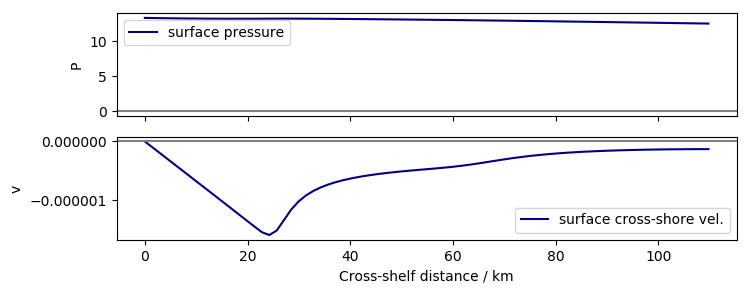

In [6]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(8,3),sharex=True)
plot_surface(ax0,ax1,v[-1,:],p[-1,:],xpl)

ratio for wave 10.1376518332
k (rad/cm)  1e-10
lambda (km)  628318.530718
omega (rad/s)  4.53920717593e-08
c (m/s) 4.53920717593


/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0.5,0,'Cross-shelf distance / km')

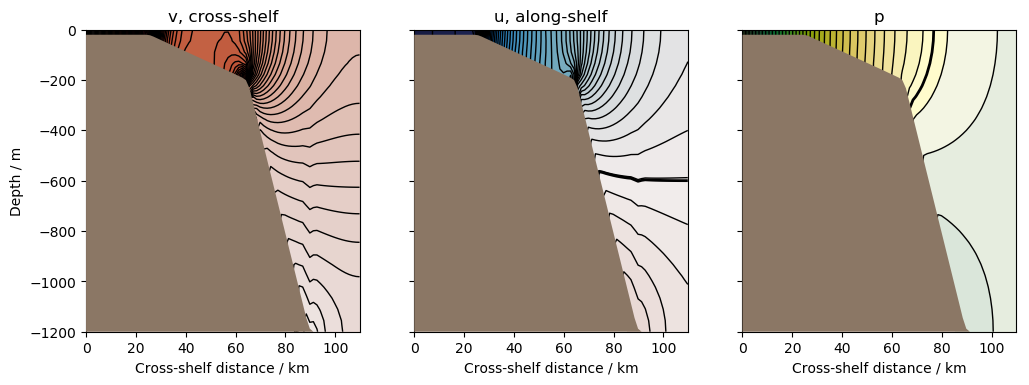

In [7]:
fig, (ax2,ax3,ax4) = plt.subplots(1,3,figsize=(12,4),sharey=True)
u,v,w,r,p,z,k,f,xpl,xxx,zzz = get_Brink('../BAR/figures_mode1_BAR.mat' ,
                                        '../BAR/ratio_for_wave_mode1_BAR.mat')
minp = - np.nanmax(p)
maxp = np.nanmax(p)
nlevels = 70
plot_Brink(ax2, ax3, ax4, u, v, p, z, xpl, xxx, zzz, minp, maxp, nlev=nlevels)
ax2.set_ylabel('Depth / m')
ax2.set_xlabel('Cross-shelf distance / km')
ax3.set_xlabel('Cross-shelf distance / km')
ax4.set_xlabel('Cross-shelf distance / km')

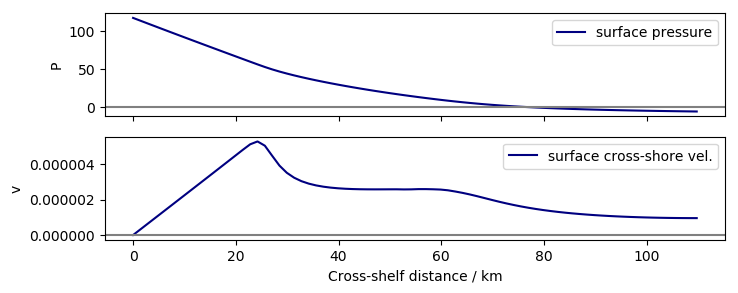

In [8]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(8,3),sharex=True)
plot_surface(ax0,ax1,v[-1,:],p[-1,:],xpl)

ratio for wave 2.02143363612
k (rad/cm)  1e-10
lambda (km)  628318.530718
omega (rad/s)  1.33399714052e-08
c (m/s) 1.33399714052


Text(0.5,0,'Cross-shelf distance / km')

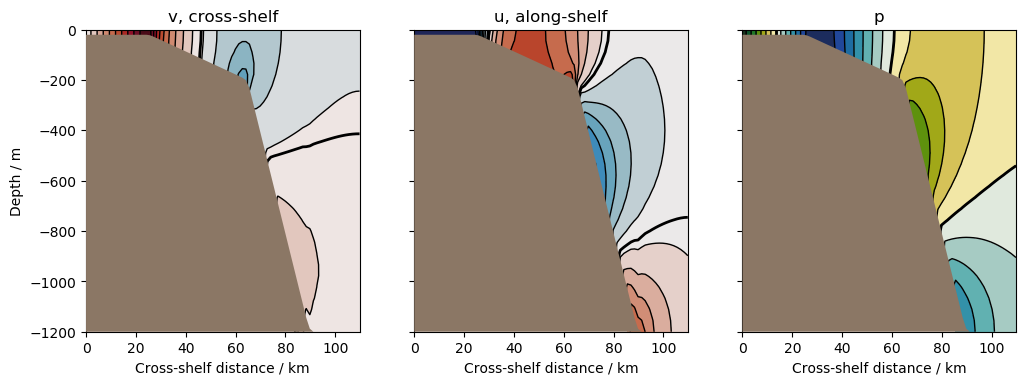

In [9]:
fig, (ax2,ax3,ax4) = plt.subplots(1,3,figsize=(12,4),sharey=True)
u,v,w,r,p,z,k,f,xpl,xxx,zzz = get_Brink('../BAR/figures_mode2_BAR.mat' ,
                                        '../BAR/ratio_for_wave_mode2_BAR.mat')
minp = np.nanmin(p)
maxp = -np.nanmin(p)
plot_Brink(ax2, ax3, ax4, u, v, p, z, xpl, xxx, zzz, minp, maxp)
ax2.set_ylabel('Depth / m')
ax2.set_xlabel('Cross-shelf distance / km')
ax3.set_xlabel('Cross-shelf distance / km')
ax4.set_xlabel('Cross-shelf distance / km')

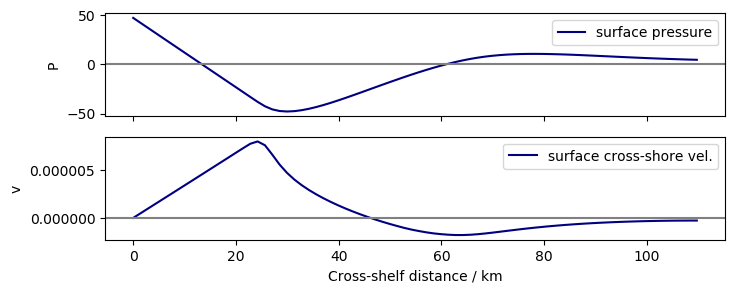

In [10]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(8,3),sharex=True)
plot_surface(ax0,ax1,v[-1,:],p[-1,:],xpl)

### Dispersion curves

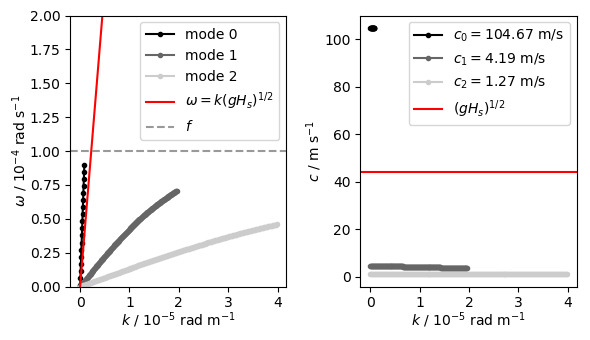

In [11]:
g = 9.81  # gravitational accel. m/s^2
Hs = 200  # m shelf break depth
f = 1.0E-4  # inertial frequency

data_mode0 = pd.read_csv('../BAR/dispc_mode0_BAR.dat', delim_whitespace=True,
                         header=None, names=['wavenum', 'freq', 'perturbation'])
data_mode1 = pd.read_csv('../BAR/dispc_mode1_BAR.dat', delim_whitespace=True,
                         header=None, names=['wavenum', 'freq', 'perturbation'])
data_mode2 = pd.read_csv('../BAR/dispc_mode2_BAR.dat', delim_whitespace=True,
                         header=None, names=['wavenum', 'freq', 'perturbation'])

omega0 = data_mode0['freq']
omega1 = data_mode1['freq'][:-3]
omega2 = data_mode2['freq']

k0 = data_mode0['wavenum']*100
k1 = data_mode1['wavenum'][:-3]*100
k2 = data_mode2['wavenum']*100

fig1, (ax0, ax1) = plt.subplots(1, 2, figsize=(6, 3.5))
ax0.plot(k0*1E5, omega0*1E4, 'k.-', label='mode 0')
ax0.plot(k1*1E5, omega1*1E4, '.-', color='0.4', label='mode 1')
ax0.plot(k2*1E5, omega2*1E4, '.-', color='0.8', label='mode 2')
ax0.plot(k1*1E5, (k1*(g*Hs)**0.5)*1E4, 'r-', label=r'$\omega=k(gH_s)^{1/2}$')
ax0.axhline(f*1E4, linestyle='--', color='0.6', label='$f$')
ax1.plot(k0*1E5, omega0/k0, 'k.-',
         label='$c_0=$%1.2f m/s' % (np.mean(omega0/k0)))
ax1.plot(k1*1E5, omega1/k1, '.-', color='0.4',
         label='$c_1=$%1.2f m/s' % (np.mean(omega1/k1)))
ax1.plot(k2*1E5, omega2/k2, '.-', color='0.8',
         label='$c_2=$%1.2f m/s' % (np.mean(omega2/k2)))
ax1.axhline((g*Hs)**0.5, linestyle='-', color='red', label='$(gH_s)^{1/2}$')

ax0.set_xlabel(r'$k$ / $10^{-5}$ rad m$^{-1}$', labelpad=0.1)
ax1.set_xlabel(r'$k$ / $10^{-5}$ rad m$^{-1}$', labelpad=0.1)
ax0.set_ylabel(r'$\omega$ / $10^{-4}$ rad s$^{-1}$', labelpad=0.1)
ax1.set_ylabel(r'$c$ / m s$^{-1}$', labelpad=-0.1)
ax0.set_ylim(0, f*2*1E4)
ax0.legend()
ax1.legend()
plt.tight_layout()
plt.savefig('../figures/disp_curve_BAR.png', format='png', bbox_inches='tight')

#### Recirculating modes

All modes (0,1,2) recirculate

Domain length $D =$ 280 km


In [12]:
D = 280E3 #  m
c0 = 104.61 #  m/s
c1 = 4.02
c2 = 0.77

T0 = D/c0
T1 = D/c1
T2 = D/c2

print('Mode 0 takes %1.2f days to recirculate' %(T0/(3600*24)))
print('Mode 1 takes %1.2f days to recirculate' %(T1/(3600*24)))
print('Mode 2 takes %1.2f days to recirculate' %(T2/(3600*24)))


Mode 0 takes 0.03 days to recirculate
Mode 1 takes 0.81 days to recirculate
Mode 2 takes 4.21 days to recirculate


### Axis profile

FileNotFoundError: [Errno 2] No such file or directory: '../BAR/figures_mode0_BARAX.mat'

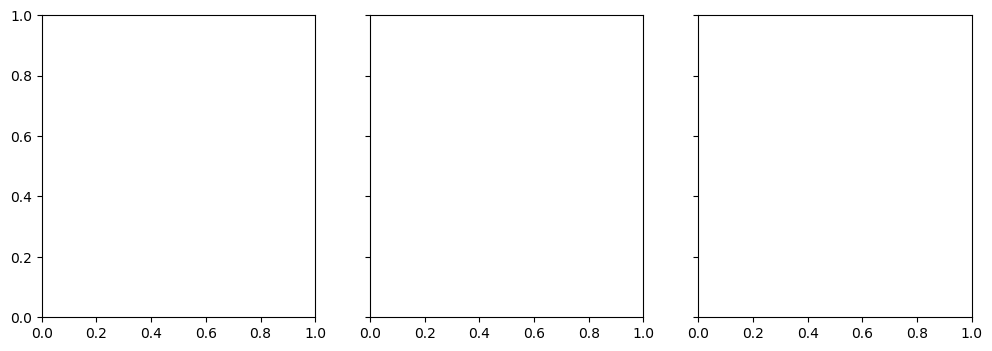

In [13]:
fig, (ax2,ax3,ax4) = plt.subplots(1,3,figsize=(12,4),sharey=True)
u,v,w,r,p,z,k,f,xpl,xxx,zzz = get_Brink('../BAR/figures_mode0_BARAX.mat' ,
                                        '../BAR/ratio_for_wave_mode0_BARAX.mat')
minp = np.nanmin(p)
maxp = np.nanmax(p)
plot_Brink(ax2, ax3, ax4, u, v, p, z, xpl, xxx, zzz, minp, maxp)
ax2.set_ylabel('Depth / m')
ax2.set_xlabel('Cross-shelf distance / km')
ax3.set_xlabel('Cross-shelf distance / km')
ax4.set_xlabel('Cross-shelf distance / km')

In [ ]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(8,3),sharex=True)
plot_surface(ax0,ax1,v[-1,:],p[-1,:],xpl)

In [ ]:
fig, (ax2,ax3,ax4) = plt.subplots(1,3,figsize=(12,4),sharey=True)
u,v,w,r,p,z,k,f,xpl,xxx,zzz = get_Brink('../BAR/figures_mode1_BARAX.mat' ,
                                        '../BAR/ratio_for_wave_mode1_BARAX.mat')
minp = - np.nanmax(p)
maxp = np.nanmax(p)
nlevels = 70
plot_Brink(ax2, ax3, ax4, u, v, p, z, xpl, xxx, zzz, minp, maxp, nlev=nlevels)
ax2.set_ylabel('Depth / m')
ax2.set_xlabel('Cross-shelf distance / km')
ax3.set_xlabel('Cross-shelf distance / km')
ax4.set_xlabel('Cross-shelf distance / km')

In [ ]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(8,3),sharex=True)
plot_surface(ax0,ax1,v[-1,:],p[-1,:],xpl)

In [ ]:
fig, (ax2,ax3,ax4) = plt.subplots(1,3,figsize=(12,4),sharey=True)
u,v,w,r,p,z,k,f,xpl,xxx,zzz = get_Brink('../BAR/figures_mode2_BARAX.mat' ,
                                        '../BAR/ratio_for_wave_mode2_BARAX.mat')
minp = np.nanmin(p)
maxp = -np.nanmin(p)
plot_Brink(ax2, ax3, ax4, u, v, p, z, xpl, xxx, zzz, minp, maxp)
ax2.set_ylabel('Depth / m')
ax2.set_xlabel('Cross-shelf distance / km')
ax3.set_xlabel('Cross-shelf distance / km')
ax4.set_xlabel('Cross-shelf distance / km')

In [ ]:
fig, (ax0,ax1) = plt.subplots(2,1,figsize=(8,3),sharex=True)
plot_surface(ax0,ax1,v[-1,:],p[-1,:],xpl)

In [ ]:
g = 9.81  # gravitational accel. m/s^2
Hs = 200  # m shelf break depth
f = 1.0E-4  # inertial frequency

data_mode0 = pd.read_csv('../BAR/dispc_mode0_BAR.dat', delim_whitespace=True,
                         header=None, names=['wavenum', 'freq', 'perturbation'])
data_mode1 = pd.read_csv('../BAR/dispc_mode1_BAR.dat', delim_whitespace=True,
                         header=None, names=['wavenum', 'freq', 'perturbation'])
data_mode2 = pd.read_csv('../BAR/dispc_mode2_BAR.dat', delim_whitespace=True,
                         header=None, names=['wavenum', 'freq', 'perturbation'])
data_mode0a = pd.read_csv('../BAR/dispc_mode0_BARAX.dat', delim_whitespace=True,
                         header=None, names=['wavenum', 'freq', 'perturbation'])
data_mode1a = pd.read_csv('../BAR/dispc_mode1_BARAX.dat', delim_whitespace=True,
                         header=None, names=['wavenum', 'freq', 'perturbation'])
data_mode2a = pd.read_csv('../BAR/dispc_mode2_BARAX.dat', delim_whitespace=True,
                         header=None, names=['wavenum', 'freq', 'perturbation'])


omega0 = data_mode0['freq']
omega1 = data_mode1['freq'][:-3]
omega2 = data_mode2['freq']
omega0a = data_mode0a['freq']
omega1a = data_mode1a['freq'][:-3]
omega2a = data_mode2a['freq']

k0 = data_mode0['wavenum']*100
k1 = data_mode1['wavenum'][:-3]*100
k2 = data_mode2['wavenum']*100
k0a = data_mode0a['wavenum']*100
k1a = data_mode1a['wavenum'][:-3]*100
k2a = data_mode2a['wavenum']*100

fig1, (ax0) = plt.subplots(1, 1, figsize=(5, 3.5))
ax0.plot(k0*1E5, omega0*1E4, '-',
         color='darkolivegreen',
         label='$c_0=$%1.2f m/s' % (np.mean(omega0/k0)))
ax0.plot(k1*1E5, omega1*1E4, '-', color='sienna', 
         label='$c_1=$%1.2f m/s' % (np.mean(omega1/k1)))
ax0.plot(k2*1E5, omega2*1E4, '-', color='maroon',
         label='$c_2=$%1.2f m/s' % (np.mean(omega2/k2)))
ax0.plot(k0a*1E5, omega0a*1E4, '-',color='olivedrab',
        label='axis $c_0=$%1.2f m/s' % (np.mean(omega0a/k0a)))
ax0.plot(k1a*1E5, omega1a*1E4, '-', color='peru', 
         label='axis $c_1=$%1.2f m/s' % (np.mean(omega1a/k1a)))
ax0.plot(k2a*1E5, omega2a*1E4, '-', color='indianred', 
         label='axis $c_2=$%1.2f m/s' % (np.mean(omega2a/k2a)))
ax0.plot(k1*1E5, (k1*(g*Hs)**0.5)*1E4, '-',color='k', label=r'$\omega=k(gH_s)^{1/2}$')
ax0.axhline(f*1E4, linestyle='--', color='0.6', label='$f$')

ax0.set_xlabel(r'$k$ / $10^{-5}$ rad m$^{-1}$', labelpad=0.1)
ax0.set_ylabel(r'$\omega$ / $10^{-4}$ rad s$^{-1}$', labelpad=0.1)
ax0.set_ylim(0, f*2*1E4)
ax0.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.savefig('../figures/disp_curve_BARAX.png', format='png', bbox_inches='tight')

In [ ]:
D = 280E3 #  m
c0 = 105.15 #  m/s
c1 = 3.80
c2 = 0.89

T0 = D/c0
T1 = D/c1
T2 = D/c2

print('Mode 0 takes %1.2f days to recirculate' %(T0/(3600*24)))
print('Mode 1 takes %1.2f days to recirculate' %(T1/(3600*24)))
print('Mode 2 takes %1.2f days to recirculate' %(T2/(3600*24)))
